In [19]:
import tensorflow as tf
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

In [15]:
model = load_model(r'C:\Users\Biki\.vscode\Project Files\.vscode\Mask detection\Models\mask_detector.model')

In [17]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/train",
    image_size = (224,224)
)

Found 2682 files belonging to 2 classes.


In [18]:
class_names = ['with_mask', 'without_mask']

In [22]:
def predict(model, img):
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_data = preprocess_input(img_array)

    predictions = model.predict(img_data)
    confidence = round(100 * (np.max(predictions[0])), 2)
    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class, confidence

1/1 [==============================] - 0s 13ms/step


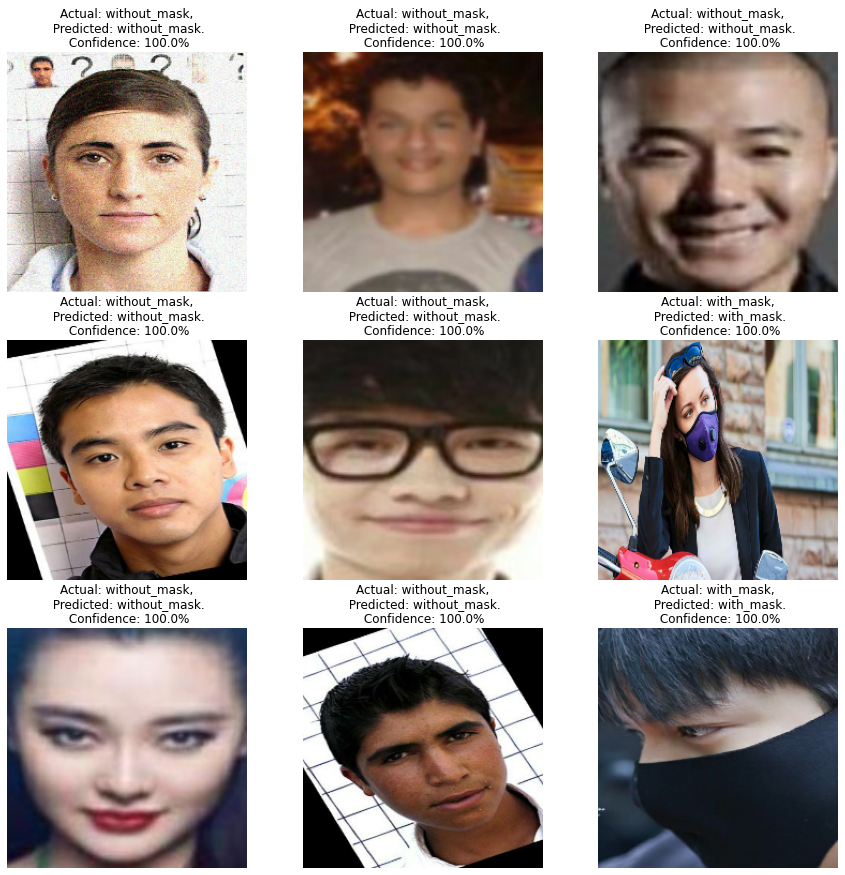

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")